<a href="https://colab.research.google.com/github/Anagha1602/Machine-Learning/blob/main/clustering_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans

import sys
from time import time

import pandas as pd
import numpy as np


In [ ]:
# only  3 categories are selected from the 20 newsgroups dataset

categories = [
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]

df = fetch_20newsgroups(subset='all', categories=categories, shuffle=False, remove=('headers', 'footers', 'quotes'))



labels = df.target
true_k = len(np.unique(labels)) ## This should be 3 in this example
print(true_k)


3


In [ ]:
"""### Perform Lemmatization"""

lemmatizer = WordNetLemmatizer()
for i in range(len(df.data)):
    word_list = word_tokenize(df.data[i])
    lemmatized_doc = ""
    for word in word_list:
        lemmatized_doc = lemmatized_doc + " " + lemmatizer.lemmatize(word)
    df.data[i] = lemmatized_doc



In [ ]:
print(df.data[0])
vectorizer = TfidfVectorizer(strip_accents='unicode', stop_words='english', min_df=2)
X = vectorizer.fit_transform(df.data)

print(X.shape)


 I think I can . Largely a a result of effort by people reading this group writing letter and making phone call the following ha happened : 1 . NASA reprogrammed fund to keep NASP alive in 1991 . 2 . Efforts to kill DC-X and the SSRT progam where twice twarted ( Feb. and June of last year ) . 3 . Gouldin kept his job in spite of heavy lobbying against him . This may not be what Mark wa thinking of but it show that the reader of sci.space DO have power and influence . Allen
(2588, 14439)


In [ ]:
"""### Clustering using standard k-means"""

km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100)
t0 = time()
km.fit(X)
print("done in %0.3fs" % (time() - t0))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


done in 0.308s


In [ ]:
# Commented out IPython magic to ensure Python compatibility.
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))  # low value indicates low homogeneity
#A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
#print("Adjusted Rand-Index: %.3f"
#       % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, km.labels_, sample_size=1000))

Homogeneity: 0.334
Completeness: 0.449
Silhouette Coefficient: 0.010


In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

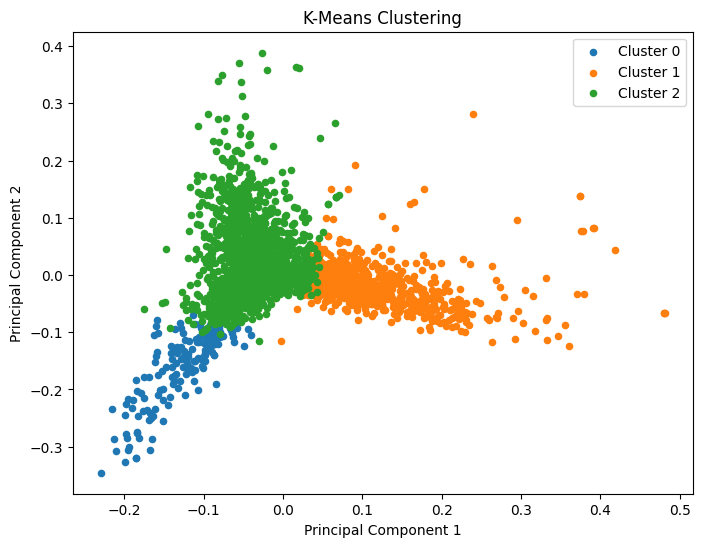

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Reduce feature space to 2 dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())
# Plotting the clustered data
plt.figure(figsize=(8, 6))
for i in range(true_k):
 plt.scatter(X_pca[km.labels_ == i, 0], X_pca[km.labels_ == i, 1],s=20, label=f'Cluster {i}')
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


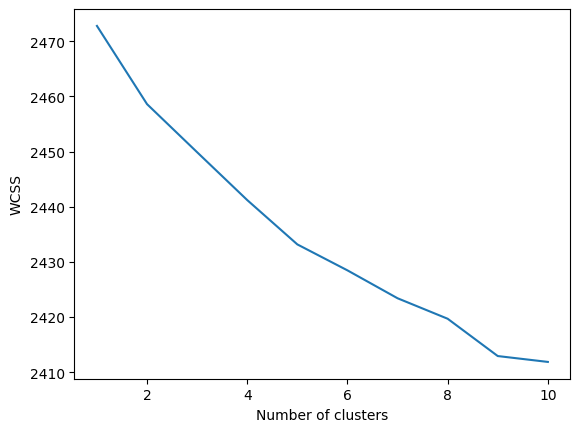

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
 kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
 kmeans.fit(X)
 wcss.append(kmeans.inertia_)
14
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
